## Objectives
1. Explain the split-apply-combine concept
2. Use the `groupby` method to aggregate data by one or more columns
3. Use `apply` to create new data by applying a function to all rows or columns
4. Use `pivot_table` to simultaneous aggregate data and pivot one or more columns to a wide format

## Exercises
We will continue to use the Baby Names file to practice common data manipulation practices using Pandas. In this exercise, we will explore a single question:

<p style="text-align:center"><b>What were the most popular male and female names in each year?</b></p>

### Load the Libraries
Run the following code cell to import each of the libraries that we will use in the lab.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q0.** Again, read the contents of the file to a DataFrame named `names`, use the Id column as the index, and inspect the first five rows.

In [2]:
### BEGIN SOLUTION
names = pd.read_csv('babynames.csv', index_col=0)
names.head()
### END SOLUTION

C:\Users\DFCS-Dell1\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


In [3]:
# DO NOT EDIT
if names is None:
    raise NameError("Did not name your DataFrame correctly")
### BEGIN HIDDEN TESTS
test_df = pd.read_csv('babynames.csv', index_col = 0)
pd.testing.assert_frame_equal(_, test_df.head())
pd.testing.assert_frame_equal(names.tail(), test_df.tail())
### END HIDDEN TESTS

In traditional Python programming, we would think about the problem in the following way:
* Initialize two lists to contain each year's most popular name for each gender
* Iterate over each year
    * Initilize variables to track the most popular name and the value of Count
    * Iterate over each name-count
        * Update if the current count is higher than the current most popular

With Pandas and NumPy, using elementwise operations is far more efficient than traditional loops. As a result, the problem becomes:
* Group by Year and Gender
* For each group, compute the most popular name
* Combine the results

In data manipulation, there is a paradigm to perform common data manipulation tasks when the data is tidy. It is the *split-apply-combine* method. In this example, we are going to split our DataFrame into many smaller ones (using `groupby`), next we apply a function to each grouping to create new data, and then we combine all of the results back into a single object to perform further computation. Pandas makes this method very easy to implement, but it can be difficult to visualize/comprehend. The rest of this exercise is meant to provide you some intuition with what is happening for each statement.

### 1. Grouping
In Pandas, we can group a DataFrame by one or more columns. This will split our DataFrame into many smaller ones where each of the smaller one has the same value for the column(s) we grouped on. Visually, this is what is happening:
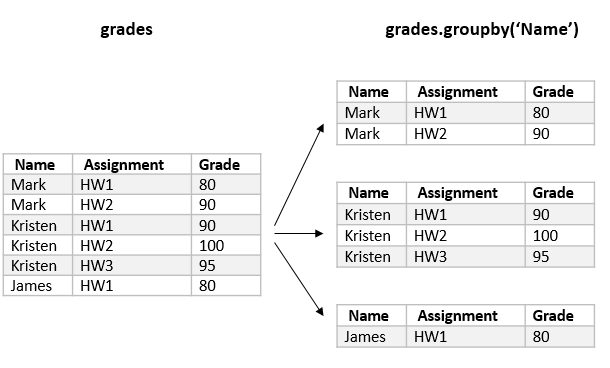

Using the `groupby` method by itself doesn't make much sense. In the below code cell, running the cell produces an output of a DataFrameGroupBy object:

In [4]:
names.groupby('Year')

Instead, we need to do the *apply-combine* portion in order to get meaningful results. The below depicts the entire *split-apply-combine* method.
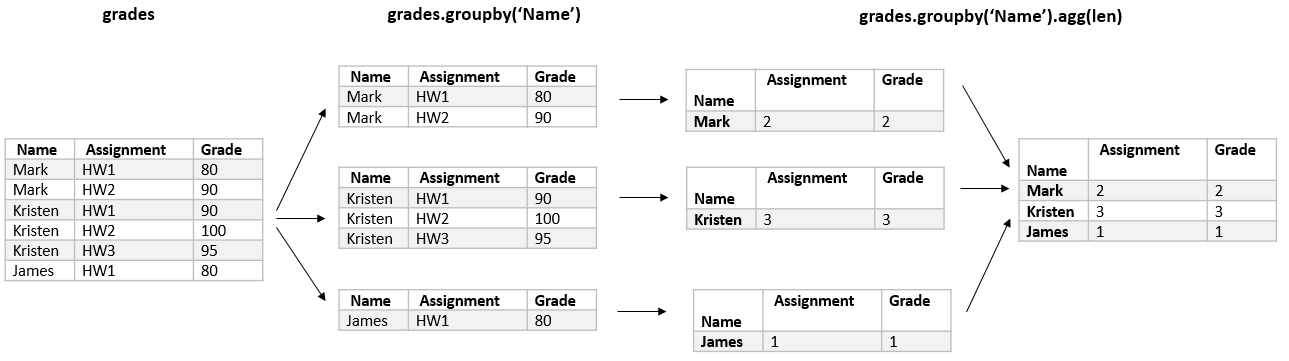

Pandas automatically combines the results into a single object, so we can achieve those results by chaining two methods: `grades.groupby('Name').agg(len)`. It also automatically sets the index to be the column that you group on. Finally, without specifying a specific column to apply the aggregation function to, it defaults to all columns that are not in the grouping.

**Q1.1.** In the below code cell, replicate the example to determine the number of rows (observations) for each year in the dataset and output the results.

In [ ]:
### BEGIN SOLUTION
names.groupby('Year').agg(len)
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.groupby('Year').count())
### END HIDDEN TESTS

The `agg` method allows you to pass one or more aggregation functions to simultaneously apply to your data. Passing the `len` function as the argument is equivalent to directly applying the `count` method to the DataFrameGroupBy object.

**Q1.2.** In this case, it doesn't really make sense to replicate the aggregation for each column. The column names, Count in particular, are misleading. This time, apply the `count` method to only the Name column and output the result.

In [ ]:
### BEGIN SOLUTION
names.groupby('Year').Name.count()
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_series_equal(_, test_df.groupby('Year').Name.count())
### END HIDDEN TESTS

This aggregation results in a Series because we slice the single column after grouping by Year, but before applying the aggregation function. If we sliced only the two columns we're interested in (Year and Name) before grouping by Year, we will get a different result.

**Q1.3.** Apply the same grouping and aggregation, but slice the columns we're interested in before applying either method. Assign the result to `unique_names`. Inspect the result to determine the difference between the two approaches.

In [ ]:
### BEGIN SOLUTION
unique_names = names.loc[:, ['Year', 'Count']].groupby('Year').count()
unique_names
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(unique_names, test_df.loc[:,['Year','Count']].groupby('Year').count())
### END HIDDEN TESTS

As an aside, we can produce the same results by applying our own custom function:
```
def length(series):
    '''returns the number of elements in the Series argument'''
    return len(series)

# apply the length function to each grouping & combine the results
names.groupby('Year').apply(length)
```

For common aggregation functions, like counting the number of observations in a group, it is better to use the builtin Pandas methods because they are much more computationally efficient than using `apply`.

We can also group by more than one column. To do so, we pass a list as the argument to `groupby`. 

**Q1.4.** Group by both Year and Gender and then aggregate by returning the maximum value for each remaining column and output the result.

In [ ]:
### BEGIN SOLUTION
names.groupby(['Year', 'Gender']).agg(max)
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.groupby(['Year', 'Gender']).agg(max))
### END HIDDEN TESTS

Does anything surprise you about the previous result? What column(s) is Pandas performing the aggregation?

In this case, Pandas performs the aggregation on each column independently and then aggregates the results. It is not that there were 19,837 babies named Zzyzx in 2018. Instead, Zzyzx is the 'maximum' name for boys (remember how Python does string comparisons for > and <) in 2018 and there were 19,837 boys named the same thing in 2018, but we do not know what that name is from this result.

**Q1.5.** Let's confirm this by subsetting our DataFrame to those where Name is Zzyzx and Year is 2018.

In [ ]:
### BEGIN SOLUTION
names.loc[(names.Name == "Zzyzx") & (names.Year == 2018)]
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.loc[(names.Name == "Zzyzx") & (names.Year == 2018)])
### END HIDDEN TESTS

Instead, we want to know the name associated with the maximum Count value. Unfortunately, there is not a builtin way to do this in Pandas.

### 2. Defining a Custom Aggregation Function
To answer this question, we will define our own aggregation function to apply to each grouping. For this function, we will take advantage that we can sort the data such that the most popular name will always be first.

**Q2.1.** Even though it seems like our data is already sorted, we are going to explicitly do so in case there are anomalies. Sort the DataFrame in descending order by the Count column and assign the result to `names_sorted`.

In [ ]:
### BEGIN SOLUTION
names_sorted = names.sort_values('Count', ascending=False)
names_sorted.head()
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_sorted = test_df.sort_values('Count', ascending=False)
pd.testing.assert_frame_equal(names_sorted.head(), test_sorted.head())
### END HIDDEN TESTS

Now when we group our data, the most popular name will always be first. 

**Q2.2.** Define a function named `most_popular` that accepts a Series (from each grouping) and return the first value from the Series.

In [ ]:
### BEGIN SOLUTION
def most_popular(in_series):
    return in_series.iloc[0]
### END SOLUTION

In [ ]:
# You may run this cell to test your function on the below test case (there are additional hidden ones)
assert most_popular(pd.Series([9, 5, 1])) == 9
### BEGIN HIDDEN TESTS
assert most_popular(pd.Series([1, 15, 10])) == 1
### END HIDDEN TESTS

**Q2.3.** Use the function you defined to aggregate the data to find the most popular names and the associated number of babies for each year and gender. Assign the result to `popular_names` and inspect the result.

In [ ]:
### BEGIN SOLUTION
popular_names = names_sorted.groupby(['Year', 'Gender']).agg(most_popular)
popular_names
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
def most_popular_test(in_series):
    return in_series.iloc[0]

pd.testing.assert_frame_equal(popular_names, test_sorted.groupby(['Year', 'Gender']).agg(most_popular_test))
### END HIDDEN TESTS

This will return a DataFrame, but the index has more than one value. This is called a multi-index and are more challenging to deal with. Working with them is out of the scope of this class, but there are three common things to remember when working with these objects:
1. You can still use the index position to access a slice: `popular_names.iloc[0:10:2]`
2. You can access a single row with labels by using a tuple: `popular_names.loc[(1880, 'F')]`
3. You can reset the index which whill make the current index labels their own columns and use row numbers as the new index: `popular_names.reset_index()`

### 3. Pivoting
The resulting DataFrame is a tidy dataset and it answers our question. However, there are times when an untidy dataset is required. FOr instance, it is sometimes more convenient to display the data in a more compact format. Or, the data may need to be formated in this manner to facilitate visualization (the Pandas `plot` wrapper is example).

**Q3.1.** In the below code cell, use the `pivot_table` function (or method, there are both) to display only the most popular names for each year where the boys names are in one column and the girls names are in the other column.

In [ ]:
### BEGIN SOLUTION
names.pivot_table(index='Year',
                  columns='Gender',
                  values='Name',
                  aggfunc=most_popular)
### END SOLUTION

In [ ]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_pivot = test_df.pivot_table(index='Year',
                                 columns='Gender',
                                 values='Name',
                                 aggfunc=most_popular_test)
pd.testing.assert_frame_equal(_, test_pivot)
### END HIDDEN TESTS

Note, this returns a DataFrame so you can use DataFrame methods on it or use it in functions that require DataFrames (like `sns.lineplot`).

### Optional. Plotting
For more practice, plot the Count of the most popular name over time for each gender. Comparing the first few rows to the last few rows of `popular_names`, it seems that the most popular name almost tripled from 1880 to 2018. Is it true that the total number of babies born tripled over that time as well? Or, are parents choosing fewer unique names? A visualization will help answer these types of questions.

Since the magnitude of the total number of babies born is much larger than the maximum Count value, it may make sense to plot these on different axes. Otherwise, one line may dominate the others. Creating multiple plots in the same figure is possible in Matplotlib, but you must explicitly define the figure and axes objects instead of letting `pyplot` handle them. Reference the Matplotlib documentation for the `subplots` function [here](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html). Below is an example to create a figure with two plots (one on top of the other).

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)  # creates a a figure object and a list of axes objects

sns.lineplot(x='Year', y='Count', data=names.loc[(names.Name == "John") & (names.Gender == 'M')], ax=ax[0])  # top plot
sns.lineplot(x='Year', y='Count', data=names.loc[(names.Name == "Mary") & (names.Gender == 'F')], ax=ax[1])  # bottom plot

plt.show()